# **Analyzing the Circuits in F1**  
**Data Management plan**

**Intial Phase**


---
Name: Jeeva Sam


**Introduction**

Formula One (also known as Formula 1 or F1) is the highest class of international auto 
racing for single-seater formula racing cars sanctioned by the Fédération Internationale de 
l'Automobile (FIA).There are different levels of data which is analyzed before race during 
race and even after the race. The teams involve with big data analytics about the cars 
performance the engine technology so on and so forth. Cars, drivers, circuits, seasons even 
technology are very crucial points which is taken into consideration while preparing for F1.


**Description**

The Goal of this Data Management Plan is to categorize the circuits of F1 race to 
understand the difficulties and thereby take the necessary strategy to win. Even though 
there are few analysis on the fastest and hardest circuits on F1, this data will give insights on 
 the circuits which will help in choosing the aerodynamics, tyre and also 
invents strategies to win the race.

**Data Source**

A json file which is given Ergast Api , which provides a historical record of motor racing data
for non- commercial purposes. The API provides data for the Formula One series, from the 
beginning of the world championships in 1950. http://ergast.com/api/f1/circuits.json
particularly gives the detail of all the circuits available.

The Json file consists of the following information.

 circuit ID :consist of unique id for each circuits 
Data type: Strings/Character.
Example: adelaide

 url:Wikipedia information of circuit. 
Data type: Strings/Character.
Example: http://en.wikipedia.org/wiki/Adelaide_Street_Circuit

 circuitName: The name of the circuits.
Data type: Strings/Character. 
Example: Adelaide Street 

 Location/locality: it gives the latitude of the circuits
Data type: Strings/Chara
Example: Adelaide

 Location/country: it gives the latitude of the circuits
Data type: Strings/Character. 
Example: Adelaide Street 


 Location/lat: it gives the latitude of the circuits.
Data type: floating point
Example: -34.9272

 Location/long: it gives the latitude of the circuits.
Data type: floating point 
decimal Example: 138.6

**DATA PROCESSING** (Intial Phase)

To analysis the circuits many information has to be inputted in the current available data 
like the turns the length, and so on.

 Input the length of each circuits,

 Update it by latest length for formula one race.

 Input the width of each circuits, and mark the run off points.

 Input number of turns in the circuits

 Input the race lap record.

 Inputting what kind of tracks.

 Set up strategies, which can be followed for certain tracks or can be analysed.

 Best overtaking points, after analyzing number of wins.

 Key corner for quick lap

 Removing the urls.

 Analyzing the circuits using above data and putting it against different styles of 
race for drivers


---


---





**STEP 1**

## **Buliding the Data.**

There are 68 circuits all over the world in which some circuits are no more in F1 race and some has intially added.Considering the above and there are flucation in circuit data every year like race distance,laps and so on, here the latest data with common circuits has been considered.

Finding data of these circuits were not easy tasks and some info was not free sources.

Through API and Github and also through manual Input have collected data to bulit a dataset.

The resources which has taken to built dataset is given below:

1st
[ from  egast api](http://ergast.com/api/f1/circuits.json).This api consisted of json file which converted into csv file.

2nd
[from git hub](https://http://ergast.com/api/f1/circuits.json).This data consisted of geojason which was converted again into csv file.

3rd
[link text](https://https://www.racefans.net/f1-information/going-to-a-race/red-bull-ring-circuit-information/).
The data here was not in form any file so it was created manually as csv file.





In [122]:
# importing library
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
#loading data set.
df = '/content/F1maual (2).csv'
df_1= pd.read_csv(df)
df_1.head()

,Name,Location,Race laps,Maximum speed,Full throttle,Longest flat-out section,Downforce level,Gear changes per lap,Fastest lap,Race distance,Corners,Drivers,Constructrs
0,Yas Marina,Abu Dhabi,55,339kph,63%,1233m,High,56,"1’34.779 (Lewis Hamilton, 2019, qualifying three)",305.355km,21,Lewis Hamilton,Mercedes
1,Albert Park,Melbourne,58,321.1kph,77%,843m,High,46,"1’21.164 (Lewis Hamilton, 2018, qualifying three)",307.574km,16,Michael Schumacher,Ferrari
2,Red Bull Ring,Austria,71,327.4kph,79%,868m,Low/medium,32,"1’02.939 (Valtteri Bottas, 2020, qualifying th...",307.02km,10,Max Verstappen,Mercedes
3,Baku City Circuit,Azerbaijan,51,337kph,0%,2010m,NaN,78,"1’40.495 (Valtteri Bottas, 2019, qualifying th...",306.051km,20,No repeat winners,Mercedes/Red Bull
4,Bahrain International Circuit,Sakhir,57,329.6kph,72%,"1,205m",Medium,56,"1’27.866 (Charles Leclerc, 2019, qualifying th...",308.238km,15,Lewis Hamilton,Mercedes/Ferrari


In [124]:
df_2 = pd.read_csv("/content/csvgithub.csv")
df_2.tail()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
38,Spa Francorchamps,Circuit de Spa-Francorchamps,1925,1950,7004m,413m
39,Spielberg,Red Bull Ring,1969,1970,4318m,721m
40,Suzuka,Suzuka International Racing,1962,1987,5807m,60m
41,NaN,Course,NaN,NaN,NaN,NaN
42,Zandvoort,Circuit Zandvoort,1948,1952,4259m,3m


In [125]:
df_3 = pd.read_csv("/content/one_df.csv")
df_3

,circuitId,url,circuitName,Location/lat,Location/long,Location/locality,Location/country
0,adelaide,http://en.wikipedia.org/wiki/Adelaide_Street_C...,Adelaide Street Circuit,-34.9272,138.617000,Adelaide,Australia
1,ain-diab,http://en.wikipedia.org/wiki/Ain-Diab_Circuit,Ain Diab,33.5786,-7.687500,Casablanca,Morocco
2,aintree,http://en.wikipedia.org/wiki/Aintree_Motor_Rac...,Aintree,53.4769,-2.940560,Liverpool,UK
3,albert_park,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Albert Park Grand Prix Circuit,-37.8497,144.968000,Melbourne,Australia
4,americas,http://en.wikipedia.org/wiki/Circuit_of_the_Am...,Circuit of the Americas,30.1328,-97.641100,Austin,USA
5,anderstorp,http://en.wikipedia.org/wiki/Scandinavian_Raceway,Scandinavian Raceway,57.2653,13.604200,Anderstorp,Sweden
6,avus,http://en.wikipedia.org/wiki/AVUS,AVUS,52.4806,13.251400,Berlin,Germany
7,bahrain,http://en.wikipedia.org/wiki/Bahrain_Internati...,Bahrain International Circuit,26.0325,50.510600,Sakhir,Bahrain
8,BAK,http://en.wikipedia.org/wiki/Baku_City_Circuit,Baku City Circuit,40.3725,49.853300,Baku,Azerbaijan
9,boavista,http://en.wikipedia.org/wiki/Circuito_da_Boavista,Circuito da Boavista,41.1705,-8.673250,Oporto,Portugal




---



---


##**Cleaning The dataset and Merging the dataset**

In [126]:
#checking the missing value.
df_1.isnull().sum()

Name                        1
Location                    1
Race laps                   0
Maximum speed               0
Full throttle               1
Longest flat-out section    4
Downforce level             4
Gear changes per lap        3
Fastest lap                 2
Race distance               0
Corners                     3
Drivers                     2
Constructrs                 3
dtype: int64

In [127]:
#sorting according to the location
df_1=df_1.sort_values(by=['Location'], ascending=True,ignore_index=True)
df_1.shape

(26, 13)

In [128]:
#intial first 6 rows of 2nd dataset are empty removing it
df_2=df_2.iloc[6:,:]
df_2

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
6,NaN,NaN,NaN,GP,NaN,NaN
7,Abu Dhabi,Yas Marina Circuit,2009,2009,5554m,9m
8,Austin,Circuit of the Americas,2012,2012,5513m,130m
9,Azerbaijan,Baku City Circuit,2016,2016,6003m,-25m
10,Barcelona,Circuit de Barcelona-Catalunya,1991,1991,4655m,165m
11,Budapest,Hungaroring,1986,1986,4381m,239m
12,Italy,AutÃ³dromo do Estoril,1972,1984,4349m,80m
13,Hockenheim,Hockenheimring,1932,1970,4574m,148m
14,Imola,Autodromo Enzo e Dino Ferrari,1953,1980,4909m,47m
15,Istanbul,Intercity Istanbul Park,2005,2005,5338m,150m


In [129]:
#renaming the columns of the second dataset
df_new = df_2.rename(columns={'Unnamed: 0': 'Location','Unnamed: 1': 'Name','Unnamed: 2': 'Year opened','Unnamed: 3': 'First GP','Unnamed: 4': 'Length','Unnamed: 5': 'Altitude'} )

In [130]:
#sorting the second dataset together
df_new=df_new.sort_values(by=['Location'], ascending=True,ignore_index=True)
df_new.tail()

,Location,Name,Year opened,First GP,Length,Altitude
32,Zandvoort,Circuit Zandvoort,1948,1952,4259m,3m
33,NaN,NaN,NaN,GP,NaN,NaN
34,NaN,Piquet,NaN,NaN,NaN,NaN
35,NaN,Algarve,NaN,NaN,NaN,NaN
36,NaN,Course,NaN,NaN,NaN,NaN


In [131]:
#remocing the unwanted rows from the second data set
df_new = df_new.iloc[:33,:]
df_new.tail()

,Location,Name,Year opened,First GP,Length,Altitude
28,Spa Francorchamps,Circuit de Spa-Francorchamps,1925,1950,7004m,413m
29,Spielberg,Red Bull Ring,1969,1970,4318m,721m
30,Suzuka,Suzuka International Racing,1962,1987,5807m,60m
31,São Paulo,AutÃ³dromo JosÃ© Carlos Pace,1940,1972,4309m,765m
32,Zandvoort,Circuit Zandvoort,1948,1952,4259m,3m


In [132]:
#merging the dataset
df_temp = df_new.merge(df_1, left_on='Location', right_on='Location', how='inner')
display(df_temp)

,Location,Name_x,Year opened,First GP,Length,Altitude,Name_y,Race laps,Maximum speed,Full throttle,Longest flat-out section,Downforce level,Gear changes per lap,Fastest lap,Race distance,Corners,Drivers,Constructrs
0,Abu Dhabi,Yas Marina Circuit,2009,2009,5554m,9m,Yas Marina,55,339kph,63%,1233m,High,56,"1’34.779 (Lewis Hamilton, 2019, qualifying three)",305.355km,21,Lewis Hamilton,Mercedes
1,Azerbaijan,Baku City Circuit,2016,2016,6003m,-25m,Baku City Circuit,51,337kph,0%,2010m,NaN,78,"1’40.495 (Valtteri Bottas, 2019, qualifying th...",306.051km,20,No repeat winners,Mercedes/Red Bull
2,Barcelona,Circuit de Barcelona-Catalunya,1991,1991,4655m,165m,Circuit de Catalunya,66,322kph,NaN,NaN,NaN,NaN,NaN,308.55km,16,Lewis Hamilton,Ferrari
3,Budapest,Hungaroring,1986,1986,4381m,239m,Hungaroring,70,315kph,50%,908m,High,NaN,"1’14.572 (Max Verstappen, 2019, qualifying three",306.67km,14,Lewis Hamilton,McLaren
4,Hockenheim,Hockenheimring,1932,1970,4574m,148m,Hockenheimring,67,313kph,53.50%,1240m,Medium,40,"1’13.306 (Michael Schumacher, 2004, qualifying...",306.458km,17,Rudolf Caracciola,Ferrari
5,Istanbul,Intercity Istanbul Park,2005,2005,5338m,150m,Istanbul Park,58,321.4 kph,69%,NaN,High,46,"1’24.770 (226.693 kph) by Juan Pablo Montoya, ...",309.396km,13,Felipe Massa,Ferrari
6,Mexico City,AutÃ³dromo Hermanos RodrÃ­guez,1962,1963,4304m,2232m,Autodromo Hermanos Rodriguez,71,349kph,45%,1200m,NaN,52,"1’14.759 (Daniel Ricciardo, 2018, qualifying t...",305.354km,17,Max Verstappen,Lotus
7,Monte Carlo,Circuit de Monaco,1929,1929,3337m,47m,Monaco circuit,78,290kph,59%,669m,Maximum,47,"1’10.166 (Lewis Hamilton, 2019, qualifying three)",260.286km,19,Ayrton Senna,McLaren
8,Monza,Autodromo Nazionale Monza,1922,1950,5793m,142m,Autodromo Nazionale Monza,53,350kph,84%,1520m,Low,36,"1’19.119 (Kimi Raikkonen, 2018, qualifying three)",306.72km,11,Lewis Hamilton,Ferrari
9,Nürburg,NÃ¼rburgring,1927,1984,5148m,627m,Nürburgring,60,316kph,74%,NaN,NaN,NaN,"1’27.691 (Takuma Sato, 2004, qualifying one",308.88km,not defined,Michael Schumacher,Ferrari


In [133]:
#finding the missing value after merging
df_temp.isnull().sum()

Location                    0
Name_x                      0
Year opened                 0
First GP                    0
Length                      0
Altitude                    0
Name_y                      0
Race laps                   0
Maximum speed               0
Full throttle               1
Longest flat-out section    3
Downforce level             4
Gear changes per lap        3
Fastest lap                 1
Race distance               0
Corners                     0
Drivers                     0
Constructrs                 0
dtype: int64

In [134]:
# 5 row are nan due to the irregularties in loaction name rectifying it.
df_1["Location"] = df_1["Location"].str.strip()


In [135]:
#merging the dataset
df_temp = df_new.merge(df_1, left_on='Location', right_on='Location', how='inner')
display(df_temp)

,Location,Name_x,Year opened,First GP,Length,Altitude,Name_y,Race laps,Maximum speed,Full throttle,Longest flat-out section,Downforce level,Gear changes per lap,Fastest lap,Race distance,Corners,Drivers,Constructrs
0,Abu Dhabi,Yas Marina Circuit,2009,2009,5554m,9m,Yas Marina,55,339kph,63%,1233m,High,56,"1’34.779 (Lewis Hamilton, 2019, qualifying three)",305.355km,21,Lewis Hamilton,Mercedes
1,Austin,Circuit of the Americas,2012,2012,5513m,130m,Circuit of the Americas,56,325.3kph,59%,1090m,Medium,66,"1’32.237 (Lewis Hamilton, 2018, qualifying three)",308.728km,20,Lewis Hamilton,Mercedes
2,Azerbaijan,Baku City Circuit,2016,2016,6003m,-25m,Baku City Circuit,51,337kph,0%,2010m,NaN,78,"1’40.495 (Valtteri Bottas, 2019, qualifying th...",306.051km,20,No repeat winners,Mercedes/Red Bull
3,Barcelona,Circuit de Barcelona-Catalunya,1991,1991,4655m,165m,Circuit de Catalunya,66,322kph,NaN,NaN,NaN,NaN,NaN,308.55km,16,Lewis Hamilton,Ferrari
4,Budapest,Hungaroring,1986,1986,4381m,239m,Hungaroring,70,315kph,50%,908m,High,NaN,"1’14.572 (Max Verstappen, 2019, qualifying three",306.67km,14,Lewis Hamilton,McLaren
5,Hockenheim,Hockenheimring,1932,1970,4574m,148m,Hockenheimring,67,313kph,53.50%,1240m,Medium,40,"1’13.306 (Michael Schumacher, 2004, qualifying...",306.458km,17,Rudolf Caracciola,Ferrari
6,Istanbul,Intercity Istanbul Park,2005,2005,5338m,150m,Istanbul Park,58,321.4 kph,69%,NaN,High,46,"1’24.770 (226.693 kph) by Juan Pablo Montoya, ...",309.396km,13,Felipe Massa,Ferrari
7,Melbourne,Albert Park Circuit,1953,1996,5027m,10m,Albert Park,58,321.1kph,77%,843m,High,46,"1’21.164 (Lewis Hamilton, 2018, qualifying three)",307.574km,16,Michael Schumacher,Ferrari
8,Mexico City,AutÃ³dromo Hermanos RodrÃ­guez,1962,1963,4304m,2232m,Autodromo Hermanos Rodriguez,71,349kph,45%,1200m,NaN,52,"1’14.759 (Daniel Ricciardo, 2018, qualifying t...",305.354km,17,Max Verstappen,Lotus
9,Monte Carlo,Circuit de Monaco,1929,1929,3337m,47m,Monaco circuit,78,290kph,59%,669m,Maximum,47,"1’10.166 (Lewis Hamilton, 2019, qualifying three)",260.286km,19,Ayrton Senna,McLaren


The final dataset has 21 rows and 17 columns in which last two rows ie.Drivers and constructors where taken from differnt resources and input manually into the dataset.

In [136]:
#final dataset missing alues
print(df_temp.shape)
df_temp.isnull().sum()

(21, 18)


Location                    0
Name_x                      0
Year opened                 0
First GP                    0
Length                      0
Altitude                    0
Name_y                      0
Race laps                   0
Maximum speed               0
Full throttle               1
Longest flat-out section    3
Downforce level             4
Gear changes per lap        3
Fastest lap                 1
Race distance               0
Corners                     0
Drivers                     0
Constructrs                 0
dtype: int64

In [137]:
#Replacing the nan value with zero as most it has no info on it and is a string value.
df_temp = df_temp.fillna(0)
df_temp

,Location,Name_x,Year opened,First GP,Length,Altitude,Name_y,Race laps,Maximum speed,Full throttle,Longest flat-out section,Downforce level,Gear changes per lap,Fastest lap,Race distance,Corners,Drivers,Constructrs
0,Abu Dhabi,Yas Marina Circuit,2009,2009,5554m,9m,Yas Marina,55,339kph,63%,1233m,High,56,"1’34.779 (Lewis Hamilton, 2019, qualifying three)",305.355km,21,Lewis Hamilton,Mercedes
1,Austin,Circuit of the Americas,2012,2012,5513m,130m,Circuit of the Americas,56,325.3kph,59%,1090m,Medium,66,"1’32.237 (Lewis Hamilton, 2018, qualifying three)",308.728km,20,Lewis Hamilton,Mercedes
2,Azerbaijan,Baku City Circuit,2016,2016,6003m,-25m,Baku City Circuit,51,337kph,0%,2010m,0,78,"1’40.495 (Valtteri Bottas, 2019, qualifying th...",306.051km,20,No repeat winners,Mercedes/Red Bull
3,Barcelona,Circuit de Barcelona-Catalunya,1991,1991,4655m,165m,Circuit de Catalunya,66,322kph,0,0,0,0,0,308.55km,16,Lewis Hamilton,Ferrari
4,Budapest,Hungaroring,1986,1986,4381m,239m,Hungaroring,70,315kph,50%,908m,High,0,"1’14.572 (Max Verstappen, 2019, qualifying three",306.67km,14,Lewis Hamilton,McLaren
5,Hockenheim,Hockenheimring,1932,1970,4574m,148m,Hockenheimring,67,313kph,53.50%,1240m,Medium,40,"1’13.306 (Michael Schumacher, 2004, qualifying...",306.458km,17,Rudolf Caracciola,Ferrari
6,Istanbul,Intercity Istanbul Park,2005,2005,5338m,150m,Istanbul Park,58,321.4 kph,69%,0,High,46,"1’24.770 (226.693 kph) by Juan Pablo Montoya, ...",309.396km,13,Felipe Massa,Ferrari
7,Melbourne,Albert Park Circuit,1953,1996,5027m,10m,Albert Park,58,321.1kph,77%,843m,High,46,"1’21.164 (Lewis Hamilton, 2018, qualifying three)",307.574km,16,Michael Schumacher,Ferrari
8,Mexico City,AutÃ³dromo Hermanos RodrÃ­guez,1962,1963,4304m,2232m,Autodromo Hermanos Rodriguez,71,349kph,45%,1200m,0,52,"1’14.759 (Daniel Ricciardo, 2018, qualifying t...",305.354km,17,Max Verstappen,Lotus
9,Monte Carlo,Circuit de Monaco,1929,1929,3337m,47m,Monaco circuit,78,290kph,59%,669m,Maximum,47,"1’10.166 (Lewis Hamilton, 2019, qualifying three)",260.286km,19,Ayrton Senna,McLaren


In [138]:
#checking any missing value again.
df_temp.isnull().sum()

Location                    0
Name_x                      0
Year opened                 0
First GP                    0
Length                      0
Altitude                    0
Name_y                      0
Race laps                   0
Maximum speed               0
Full throttle               0
Longest flat-out section    0
Downforce level             0
Gear changes per lap        0
Fastest lap                 0
Race distance               0
Corners                     0
Drivers                     0
Constructrs                 0
dtype: int64

In [140]:
#renaming the columns to later create a database
df_temp = df_temp.rename(columns={'Year opened': 'Year_opened', 'First GP': 'First_GP','Race laps':'Race_laps','Maximum speed':'Maximum_speed','Full throttle':'Full_throttle','Longest flat-out section':'Longest_flat_out_section','Downforce level':'Downforce_level','Gear changes per lap':'Gear_changes_per_lap','Fastest lap':'Fastest_lap','Race distance':'Race_distance'})

In [150]:
df_temp.columns

Index(['Location', 'Name_x', 'Year_opened', 'First_GP', 'Length', 'Altitude',
       'Race_laps', 'Maximum_speed', 'Full_throttle',
       'Longest_flat_out_section', 'Downforce_level', 'Gear_changes_per_lap',
       'Fastest_lap', 'Race_distance', 'Corners', 'Drivers', 'Constructrs'],
      dtype='object')

In [142]:
#checking for the datatype so to convert it into int or floata s required.
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 20
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Location                  21 non-null     object
 1   Name_x                    21 non-null     object
 2   Year_opened               21 non-null     object
 3   First_GP                  21 non-null     object
 4   Length                    21 non-null     object
 5   Altitude                  21 non-null     object
 6   Name_y                    21 non-null     object
 7   Race_laps                 21 non-null     int64 
 8   Maximum_speed             21 non-null     object
 9   Full_throttle             21 non-null     object
 10  Longest_flat_out_section  21 non-null     object
 11  Downforce_level           21 non-null     object
 12  Gear_changes_per_lap      21 non-null     object
 13  Fastest_lap               21 non-null     object
 14  Race_distance             21

In [144]:
#Most of the columns are object converying it into the necssary data type
 #extracting only the float value form the columns.
df_temp['Longest_flat_out_section'] = df_temp['Longest_flat_out_section'].str.extract('(\d+)', expand=False).astype(float)  
df_temp['Length'] = df_temp['Length'].str.extract('(\d+)', expand=False).astype(float)  
df_temp['Maximum_speed'] = df_temp['Maximum_speed'].str.extract('(\d+)', expand=False).astype(float)
df_temp['Race_distance'] = df_temp['Race_distance'].str.extract('(\d+)', expand=False).astype(float)
df_temp["Gear_changes_per_lap"]=df_temp["Gear_changes_per_lap"].astype(float)

In [145]:
#under column a string value is replaced with numerical there by converted to integer
df_temp["Corners"].replace({"not defined": "0"},inplace=True)
df_temp["Corners"]=df_temp["Corners"].astype(int)

In [146]:
#Deleting the column
del df_temp["Name_y"]

###**Storing the dataframe into sql database using SQlite**

In [ ]:
import sqlite3
#creating the database
con=sqlite3.connect("new_database_3.db")"""

In [190]:
#creating the Table  
def sql_table(con):
    cursorobj=con.cursor()
    cursorobj.execute('CREATE TABLE new_table_1(Location PRIMARY KEY,Name_x,Year_opened,First_GP,Length,Altitude,Race_laps,Maximum_speed,Full_throttle,Longest_flat_out_section,Downforce_level,Gear_changes_per_lap,Fastest_lap,Race_distance,Corners,Drivers,Constructrs)')
    con.commit()
sql_table(con)

In [191]:
#To check whether the table is stored
def tables_in_sqlite(con):
    cursorobj=con.execute("Select name from sqlite_master where type='table';")
    tables=[
            v[0] for v in cursorobj.fetchall()
            if v[0] != "sqlite_sequence"
    ]
    cursorobj.close()
    return tables

In [199]:
tables_in_sqlite(con)

["new_table_1'", 'new_table_1']

In [193]:
column_1=df_temp[['Location','Name_x','Year_opened','First_GP','Length','Altitude','Race_laps','Maximum_speed','Full_throttle','Longest_flat_out_section','Downforce_level','Gear_changes_per_lap','Fastest_lap','Race_distance','Corners','Drivers','Constructrs']]

In [196]:
#putting the dataframe into the table which is created
column_1.to_sql("new_table_1",con,if_exists="append",index=False)

In [197]:
#to see whether the data has been stored inthe table
cursorobj=con.cursor()
rows=cursorobj.execute("Select * from new_table_1").fetchall()

In [198]:
rows

[('Abu Dhabi',
  'Yas Marina Circuit',
  '2009',
  '2009',
  5554.0,
  '9m',
  55,
  339.0,
  '63%',
  1233.0,
  'High',
  56.0,
  '1’34.779 (Lewis Hamilton, 2019, qualifying three)',
  305.0,
  21,
  'Lewis Hamilton',
  'Mercedes'),
 ('Austin',
  'Circuit of the Americas',
  '2012',
  '2012',
  5513.0,
  '130m',
  56,
  325.0,
  '59%',
  1090.0,
  'Medium',
  66.0,
  '1’32.237 (Lewis Hamilton, 2018, qualifying three)',
  308.0,
  20,
  'Lewis Hamilton',
  'Mercedes'),
 ('Azerbaijan',
  'Baku City Circuit',
  '2016',
  '2016',
  6003.0,
  '-25m',
  51,
  337.0,
  '0%',
  2010.0,
  0,
  78.0,
  '1’40.495 (Valtteri Bottas, 2019, qualifying three)',
  306.0,
  20,
  'No repeat winners',
  'Mercedes/Red Bull'),
 ('Barcelona',
  'Circuit de Barcelona-Catalunya',
  '1991',
  '1991',
  4655.0,
  '165m',
  66,
  322.0,
  0,
  None,
  0,
  0.0,
  0,
  308.0,
  16,
  'Lewis Hamilton',
  'Ferrari'),
 ('Budapest',
  'Hungaroring',
  '1986',
  '1986',
  4381.0,
  '239m',
  70,
  315.0,
  '50%',
  9

In [ ]:
#In this data there is nothing much to be grouped and different table to be created.So converting back to the datafarme
pd.DataFrame(rows)



---


###**Analysis of circuits through Graphs**

---



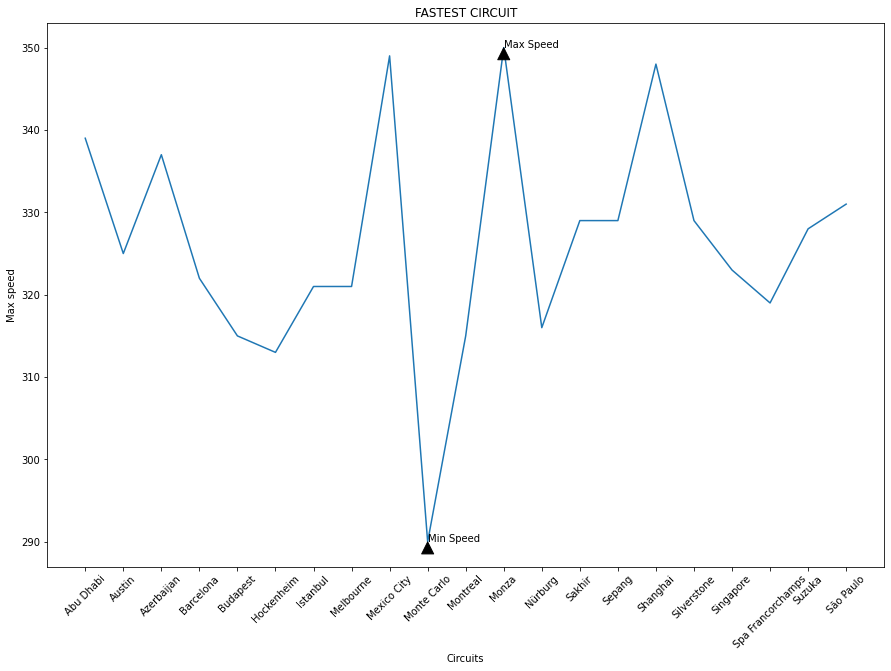

In [151]:
plt.figure(figsize=(15,10))
y=df_temp['Maximum_speed']
x=df_temp["Location"]

ax=plt.plot(x,y)
ymax= max(df_temp['Maximum_speed'])

xpos = df_temp[df_temp['Maximum_speed']== 350].index.values
xmax = x[xpos]
plt.annotate("Max Speed", (xmax,ymax),arrowprops=dict(facecolor='black', shrink=0.05))
ymin= min(df_temp['Maximum_speed'])

xpos_1 = df_temp[df_temp['Maximum_speed']== ymin].index.values
xmin = x[xpos_1]
plt.annotate("Min Speed", (xmin,ymin),arrowprops=dict(facecolor='black', shrink=0.05))
plt.title("FASTEST CIRCUIT")
plt.xlabel("Circuits")
plt.ylabel("Max speed")
plt.xticks(rotation=45)
plt.show()

According to the graph the fastest circuit is Monza circuit.This is data does not include the latest circuits. 


---



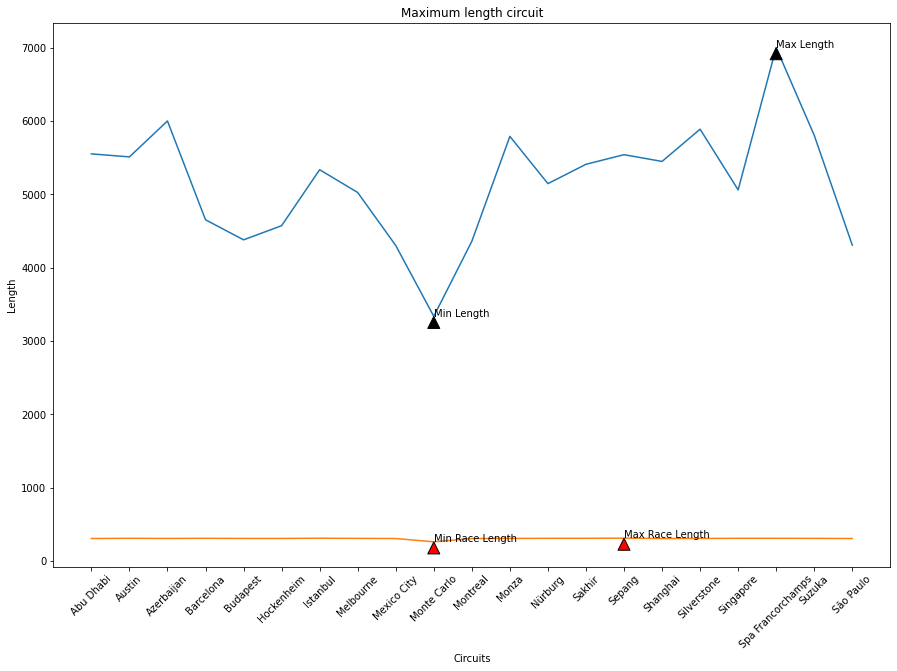

In [154]:
plt.figure(figsize=(15,10))
y=df_temp['Length']
x=df_temp["Location"]
ax=plt.plot(x,y)

ymax= max(df_temp['Length'])
xpos = df_temp[df_temp['Length']== ymax].index.values
xmax = x[xpos]

plt.annotate("Max Length", (xmax,ymax),arrowprops=dict(facecolor='black', shrink=0.05))

ymin= min(df_temp['Length'])
xpos_1 = df_temp[df_temp['Length']== ymin].index.values
xmin = x[xpos_1]

plt.annotate("Min Length", (xmin,ymin),arrowprops=dict(facecolor='black', shrink=0.05))

y_1=df_temp['Race_distance']
x_1=df_temp["Location"]

ax_1=plt.plot(x_1,y_1)

ymax_1= max(df_temp['Race_distance'])

xpos_2 = df_temp[df_temp['Race_distance']== ymax_1].index.values
xmax_1 = x_1[xpos_2]
plt.annotate("Max Race Length", (xmax_1,ymax_1),arrowprops=dict(facecolor='red', shrink=0.05))

ymin_1= min(df_temp['Race_distance'])
xpos_3 = df_temp[df_temp['Race_distance']== ymin_1].index.values
xmin_1 = x_1[xpos_3]
plt.annotate("Min Race Length", (xmin_1,ymin_1),arrowprops=dict(facecolor='red', shrink=0.05))
plt.title("Maximum length circuit") 
plt.xlabel("Circuits")
plt.ylabel("Length")
plt.xticks(rotation=45)
plt.show()

This data shows out of the total length of the circuit how much is used for the Race purpose according to the data most of the circuit uses only 10% of there actaul lenth which is given in meters.


---



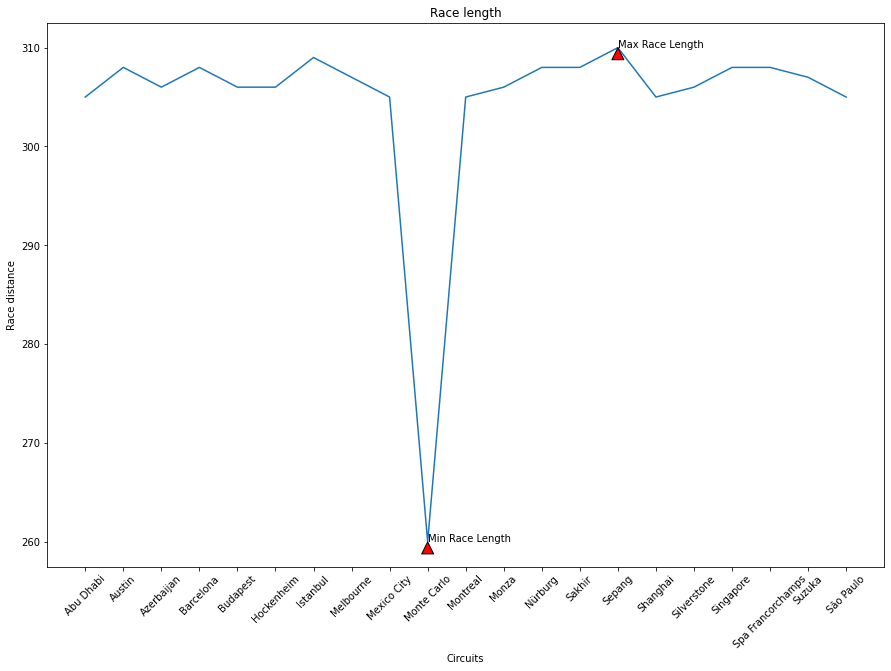

In [159]:
plt.figure(figsize=(15,10))
y_1=df_temp['Race_distance']
x_1=df_temp["Location"]

ax_1=plt.plot(x_1,y_1)

ymax_1= max(df_temp['Race_distance'])
xpos_2 = df_temp[df_temp['Race_distance']== ymax_1].index.values
xmax_1 = x_1[xpos_2]
plt.annotate("Max Race Length", (xmax_1,ymax_1),arrowprops=dict(facecolor='red', shrink=0.05))

ymin_1= min(df_temp['Race_distance'])
xpos_3 = df_temp[df_temp['Race_distance']== ymin_1].index.values
xmin_1 = x_1[xpos_3]
plt.annotate("Min Race Length", (xmin_1,ymin_1),arrowprops=dict(facecolor='red', shrink=0.05))

plt.title("Race length")
plt.xlabel("Circuits")
plt.ylabel("Race distance")
plt.xticks(rotation=45)
plt.show()

This data shows the shortest race circuit is Circuit de Monaco situated in Monye Carlo which is a street circuit. and also by refering the pervious graph this same circuit has the slowest speed, accorfing to the information Monoca has slowest turns in the circuit history.
This data can be used to decide the statergy in choosing the right tyre.(soft tyre or hard tyres)


---



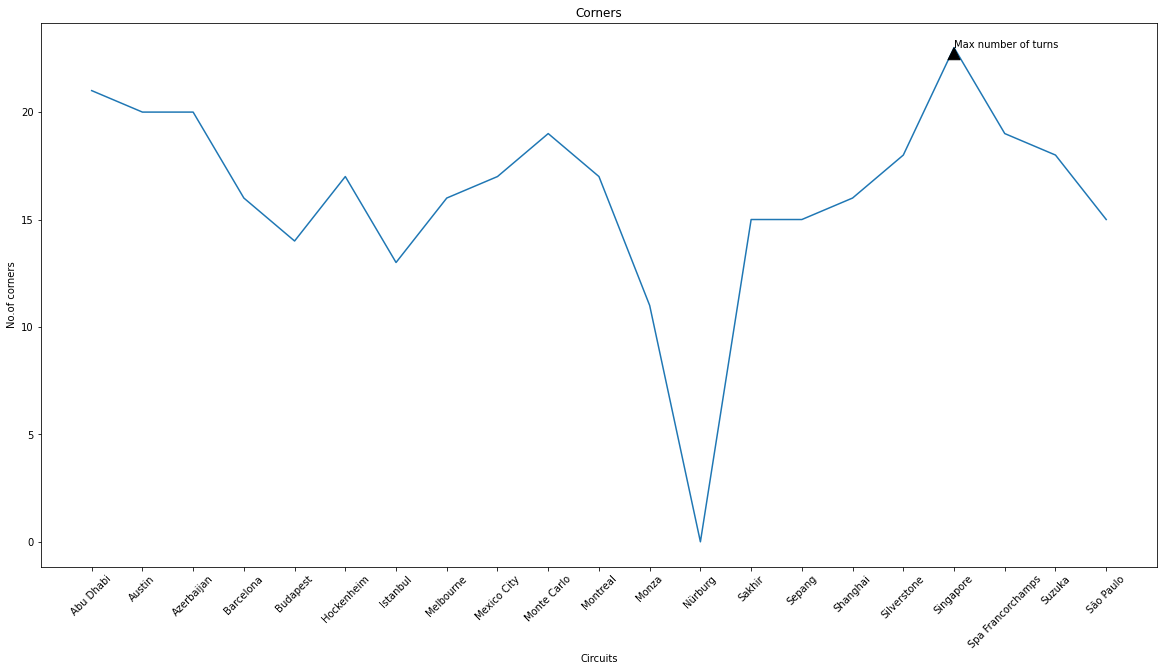

In [162]:
plt.figure(figsize=(20,10))
y=df_temp['Corners']
x=df_temp["Location"]
ax=plt.plot(x,y)

ymax= max(df_temp['Corners'])

xpos = df_temp[df_temp['Corners']== ymax].index.values
xmax = x[xpos]
plt.annotate("Max number of turns", (xmax,ymax),arrowprops=dict(facecolor='black', shrink=0.05))

plt.title("Corners")
plt.xlabel("Circuits")
plt.ylabel("No.of corners")

plt.xticks(rotation=45)
plt.show()

According to the data the maximum number of corners is for the Marina Bay which is situtated in Singapore.

Here Nurburgring is having least corners as the corners are not defined for this circuit and still it on going discussion of the number of turns of the circuit.But according to wikipedia it has 15 corners.

This can be fruther taken, each corner can be analysed which can help the teams to find the right statergy foe theareodynamics of the car while moving in a turn.


---



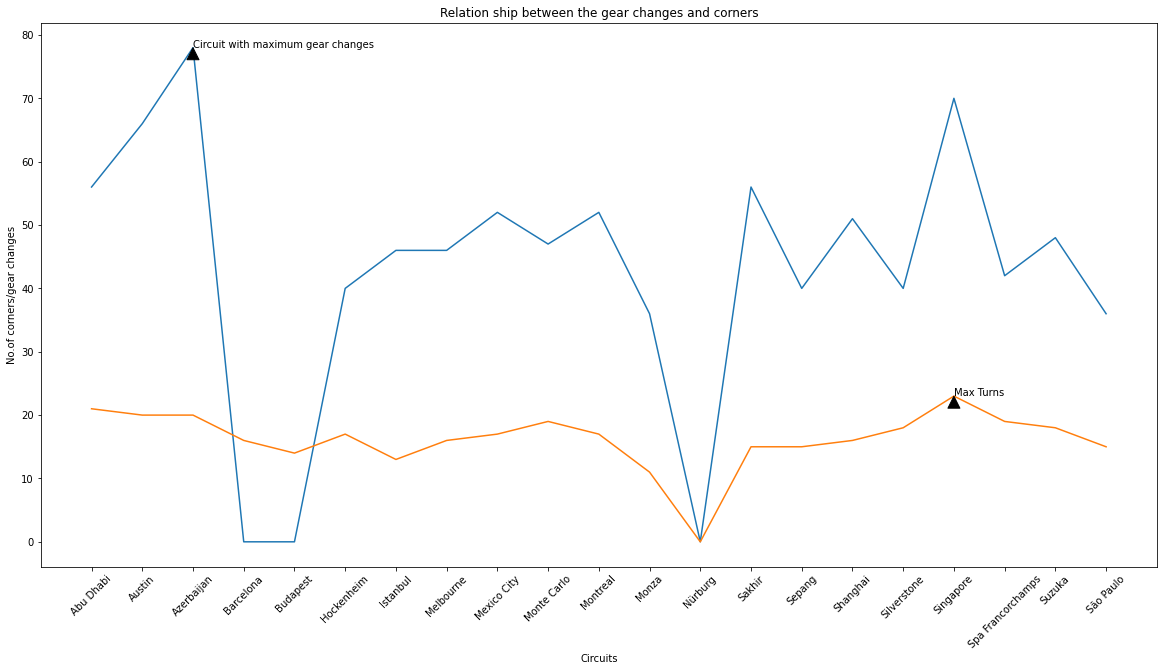

In [164]:
plt.figure(figsize=(20,10))
y=df_temp['Gear_changes_per_lap']
x=df_temp["Location"]
ax=plt.plot(x,y)

ymax= max(df_temp['Gear_changes_per_lap'])

xpos = df_temp[df_temp['Gear_changes_per_lap']== ymax].index.values
xmax = x[xpos]
plt.annotate("Circuit with maximum gear changes", (xmax,ymax),arrowprops=dict(facecolor='black', shrink=0.05))

y=df_temp['Corners']
x=df_temp["Location"]
ax=plt.plot(x,y)

ymax= max(df_temp['Corners'])

xpos = df_temp[df_temp['Corners']== ymax].index.values
xmax = x[xpos]
plt.annotate("Max Turns", (xmax,ymax),arrowprops=dict(facecolor='black', shrink=0.05))

plt.title("Relation ship between the gear changes and corners")
plt.xlabel("Circuits")
plt.ylabel("No.of corners/gear changes")
plt.xticks(rotation=45)
plt.show()

In [167]:
np.array(df_temp['Gear_changes_per_lap']).mean()

42.95238095238095

According to the graph, There would not be direct relationship, but if we closely observe the peaks follow the same direction in both the plot(apart from the missing value).Towards the end of the graph a strong relationship is obseved.

This gives us an idea of studing the corner more seriously to detemine the gear changes in  a complete race.which will also help to analysis the car gear system as well.

And averge of the gear change per graph is ranging from 40 to 50.


---



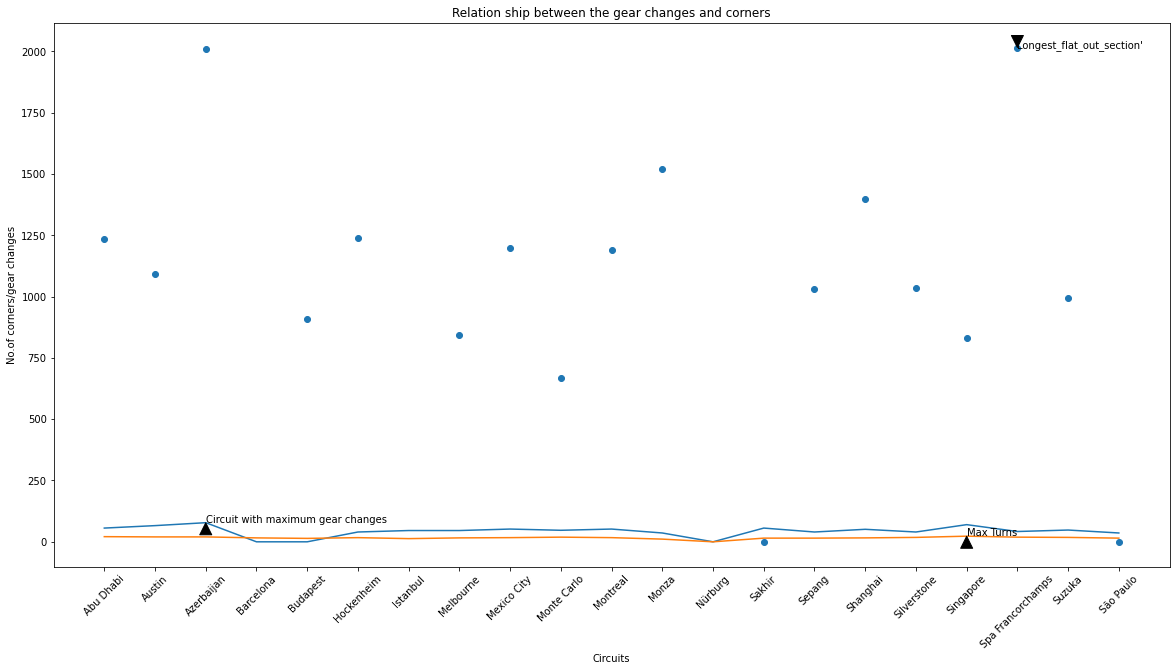

In [168]:
plt.figure(figsize=(20,10))
y=df_temp['Gear_changes_per_lap']
x=df_temp["Location"]
ax=plt.plot(x,y)

ymax= max(df_temp['Gear_changes_per_lap'])

xpos = df_temp[df_temp['Gear_changes_per_lap']== ymax].index.values
xmax = x[xpos]
plt.annotate("Circuit with maximum gear changes", (xmax,ymax),arrowprops=dict(facecolor='black', shrink=0.05))

y=df_temp['Corners']
x=df_temp["Location"]
ax=plt.plot(x,y)

ymax= max(df_temp['Corners'])

xpos = df_temp[df_temp['Corners']== ymax].index.values
xmax = x[xpos]
plt.annotate("Max Turns", (xmax,ymax),arrowprops=dict(facecolor='black', shrink=0.05))

y=df_temp['Longest_flat_out_section']
x=df_temp["Location"]
ax=plt.scatter(x,y)

ymax= max(df_temp['Longest_flat_out_section'])

xpos = df_temp[df_temp['Longest_flat_out_section']== ymax].index.values
xmax = x[xpos]
plt.annotate("Longest_flat_out_section'", (xmax,ymax),arrowprops=dict(facecolor='black', shrink=0.05))

plt.title("Relation ship between the gear changes and corners")
plt.xlabel("Circuits")
plt.ylabel("No.of corners/gear changes")
plt.xticks(rotation=45)
plt.show()

Longest flat out section is were the cars can take there accelration and control when the turn comes.


---



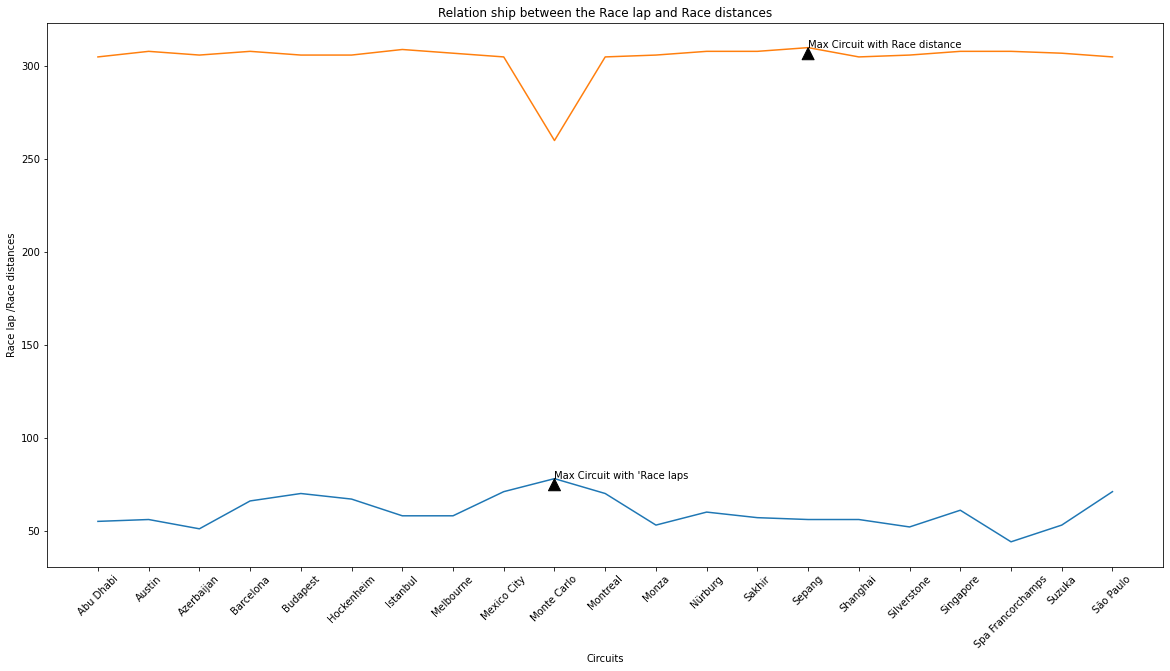

In [179]:
plt.figure(figsize=(20,10))
y=df_temp['Race_laps']
x=df_temp["Location"]
ax=plt.plot(x,y)

ymax= max(df_temp['Race_laps'])

xpos = df_temp[df_temp['Race_laps']== ymax].index.values
xmax = x[xpos]
plt.annotate("Max Circuit with 'Race laps", (xmax,ymax),arrowprops=dict(facecolor='black', shrink=0.05))

y=df_temp['Race_distance']
x=df_temp["Location"]
ax=plt.plot(x,y)

ymax= max(df_temp['Race_distance'])

xpos = df_temp[df_temp['Race_distance']== ymax].index.values
xmax = x[xpos]
plt.annotate("Max Circuit with Race distance", (xmax,ymax),arrowprops=dict(facecolor='black', shrink=0.05))
plt.title("Relation ship between the Race lap and Race distances")
plt.xlabel("Circuits")
plt.ylabel("Race lap /Race distances")

plt.xticks(rotation=45)
plt.show()


In [177]:
np.array(df_temp['Race_laps']).mean()

60.142857142857146

This data can give us the information about the averge lap per the race distance which can  detemine what is the averge length of a race lap is.


---



---



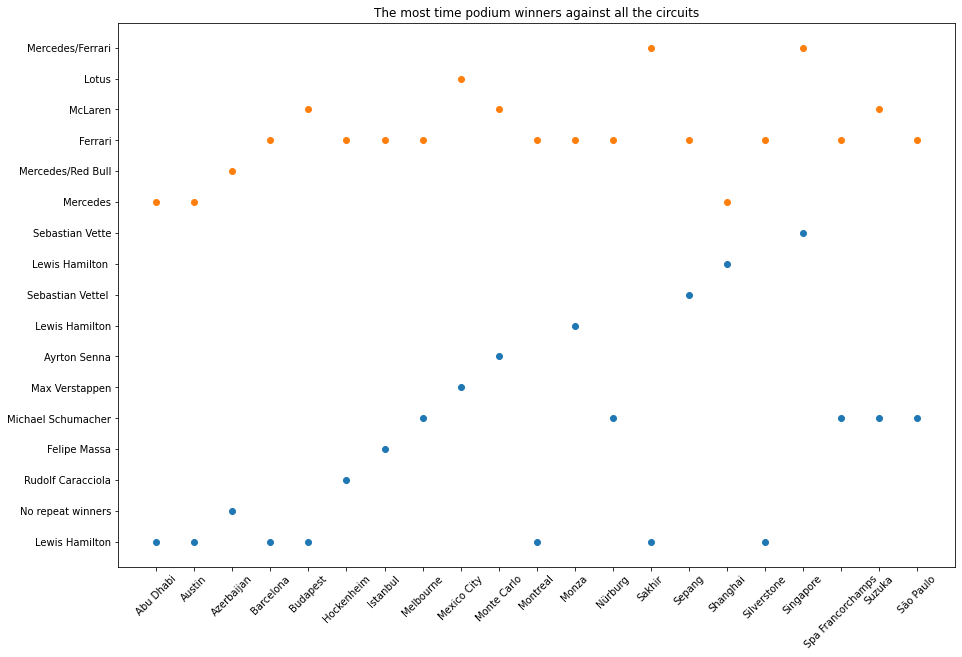

In [185]:
plt.figure(figsize=(15,10))
plt.scatter(df_temp['Location'],df_temp['Drivers'])
plt.scatter(df_temp['Location'],df_temp['Constructrs'])
plt.title("The most time podium winners against all the circuits")
plt.xticks(rotation=45)
plt.show()

The best way to analyis a circuit rather than their physical condition is to analyis race patterns of that particular circuit.As you can see how different circuits were won by number drivers and also team, which can be used understand the statergies used by the team or the particular car apart from the car performance.


---



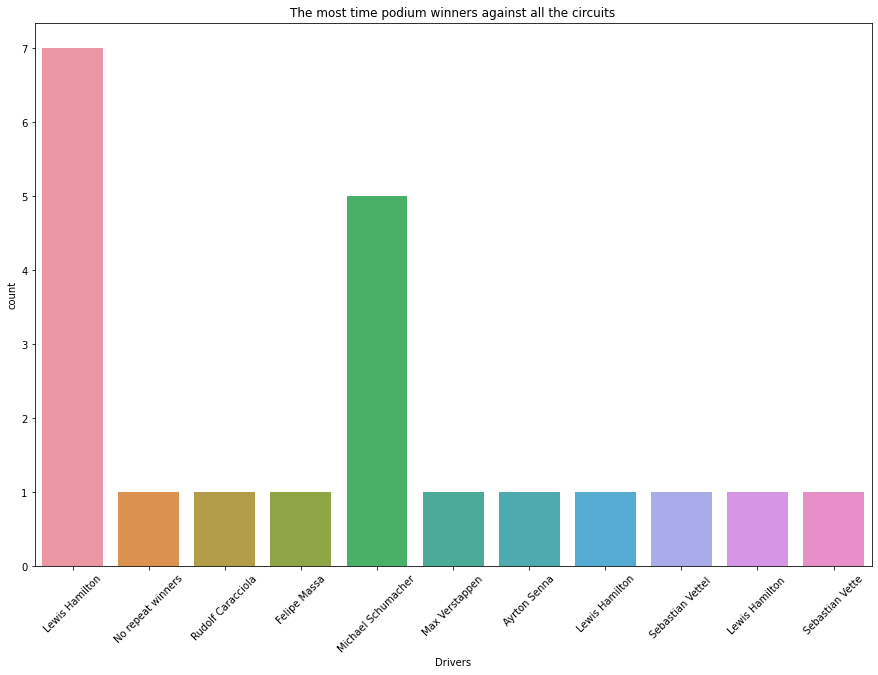

In [180]:
plt.figure(figsize=(15,10))
sns.countplot(x=df_temp['Drivers'],data=df_temp)
plt.title("The most time podium winners against all the circuits")
plt.xticks(rotation=45)
plt.show()

This graph is to just analyse which drivers has won the most among all the circuits.


---



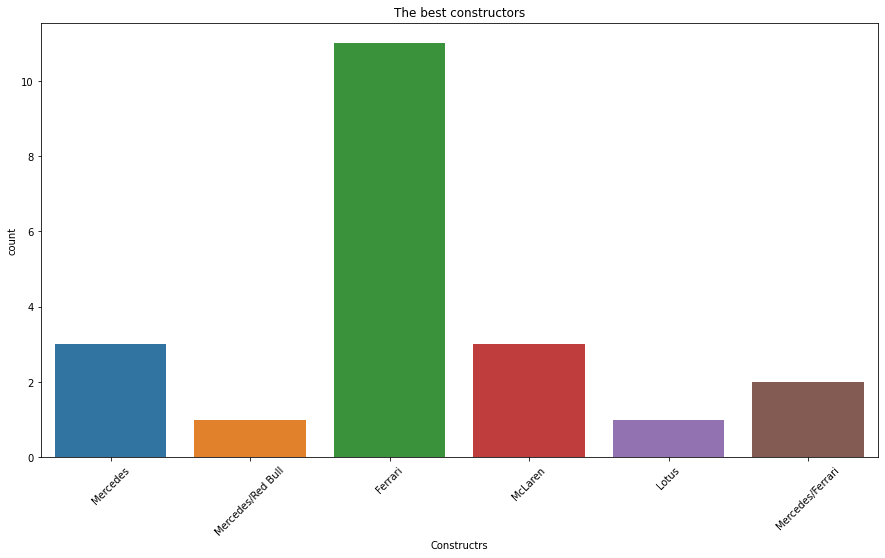

In [188]:
plt.figure(figsize=(15,8))
sns.countplot(x=df_temp['Constructrs'],data=df_temp)
plt.title("The best constructors")
plt.xticks(rotation=45)
plt.show()

This graph is to just analyse which contructors has won the most among all the circuits.


---



---



**Final Phase**

Comparing with the intial Phase, 95% of the goal is achievied.

The achieved data goals are:

 Input the length of each circuits,

 Update it by latest length for formula one race.

 Input the width of each circuits, and mark the run off points.

 Input number of turns in the circuits

 Input the race lap record.

 Inputting what kind of tracks.

 Set up strategies, which can be followed for certain tracks or can be analysed.

And not achieved goal:
  Best overtaking points, after analyzing number of wins.
  Key corner for quick lap.(For this more infomation is needed from right full sources which was not obtained).


##**Conclusion**
In this dataset we have analysed ,
about The F1 circuits with limited data which was collected and bulit manually.
Future scope can be analysing the circuit with more simulation data and techinicallity and also integrating all the new and latest circuits.